In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv('../data/clean_political_social_media.csv')
df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,language_name,cantidad_arrobas,cantidad_hashtag,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,85,Senator,English,0,1,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,136,Representative,English,0,0,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,139,Representative,English,0,2,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,110,Representative,English,0,0,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,128,Representative,English,1,1,...,0,0,0,0,0,0,0,0,0,0


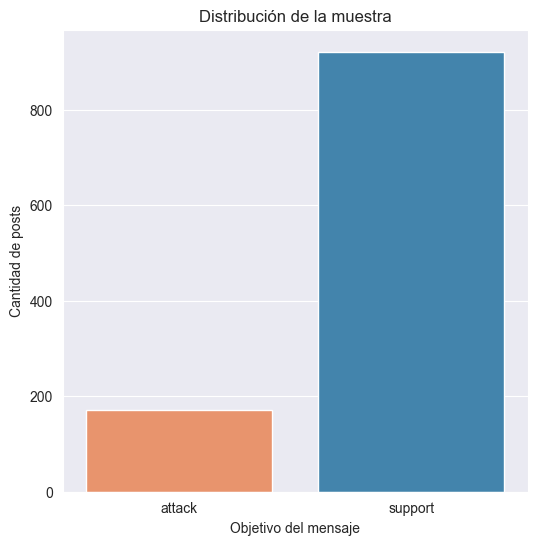

Porcentajes de posts de apoyo en la muestra: 84.26349496797805
Porcentajes de posts de ataque en la muestra: 15.736505032021958


In [3]:
rcParams['figure.figsize'] = 6,6
paleta = ["#fc8d59","#3288bd"]

df['message'].value_counts()
sns.countplot(x='message', data=df, palette=paleta)
plt.xlabel("Objetivo del mensaje")
plt.ylabel("Cantidad de posts")
plt.title("Distribución de la muestra")
plt.show()



attack = len(df[df['message']=='attack'])
support = len(df[df['message']=='support'])
ataque_porciento =( attack / (attack + support) * 100)
apoyo_porciento= (support / (attack + support) * 100)
print('Porcentajes de posts de apoyo en la muestra:', apoyo_porciento)
print('Porcentajes de posts de ataque en la muestra:', ataque_porciento)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unit_id              1093 non-null   int64 
 1   audience             1093 non-null   object
 2   bias                 1093 non-null   object
 3   message              1093 non-null   object
 4   source               1093 non-null   object
 5   cantidad_caracteres  1093 non-null   int64 
 6   cargo                1093 non-null   object
 7   language_name        1093 non-null   object
 8   cantidad_arrobas     1093 non-null   int64 
 9   cantidad_hashtag     1093 non-null   int64 
 10  tiene_obama          1093 non-null   int64 
 11  tiene_obamacare      1093 non-null   int64 
 12  tiene_costs          1093 non-null   int64 
 13  tiene_venezuela      1093 non-null   int64 
 14  tiene_demandar       1093 non-null   int64 
 15  tiene_remember       1093 non-null   int64 
 16  tiene_

In [5]:
numericas = df.select_dtypes(exclude=['object']).columns
numericas

Index(['unit_id', 'cantidad_caracteres', 'cantidad_arrobas',
       'cantidad_hashtag', 'tiene_obama', 'tiene_obamacare', 'tiene_costs',
       'tiene_venezuela', 'tiene_demandar', 'tiene_remember', 'tiene_stuck',
       'tiene_higher', 'tiene_spawning', 'tiene_please', 'tiene_join',
       'tiene_great', 'tiene_vote', 'tiene_share', 'tiene_applaud',
       'tiene_clinton'],
      dtype='object')

# 1- Escalado

## Cantidad de caracteres

<AxesSubplot: title={'center': 'Boxplot decantidad_caracteres'}, xlabel='cantidad_caracteres'>

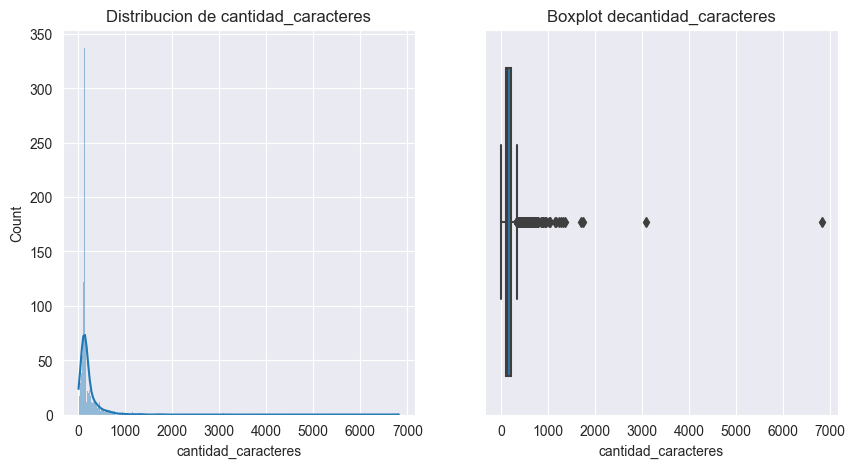

In [6]:
variable = 'cantidad_caracteres'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

Podemos obervar, que pareceria ser una distribucion normal, pero con outliers. Po rlo tanto esclaamos con robusto

In [7]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df['cantidad_caracteres'] = rb_scaler.fit_transform(df[['cantidad_caracteres']])
df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,language_name,cantidad_arrobas,cantidad_hashtag,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Senator,English,0,1,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Representative,English,0,0,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Representative,English,0,2,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Representative,English,0,0,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Representative,English,1,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: title={'center': 'Boxplot decantidad_caracteres'}, xlabel='cantidad_caracteres'>

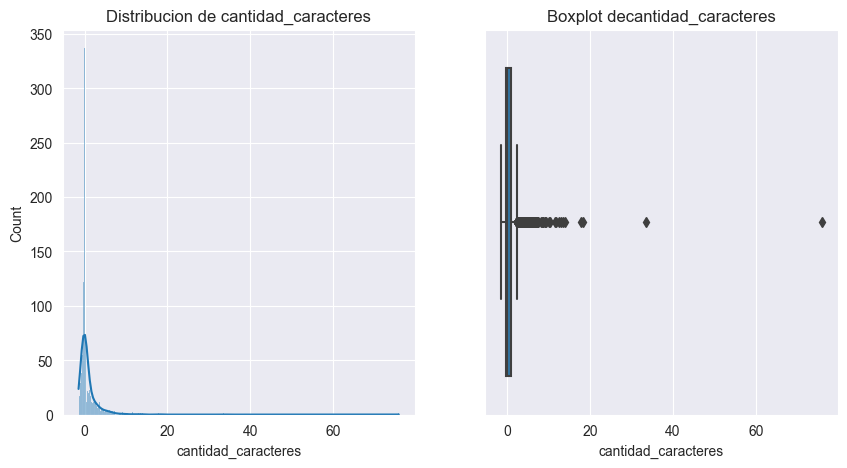

In [8]:
variable = 'cantidad_caracteres'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

## Cantidad arrobas

<AxesSubplot: title={'center': 'Boxplot decantidad_arrobas'}, xlabel='cantidad_arrobas'>

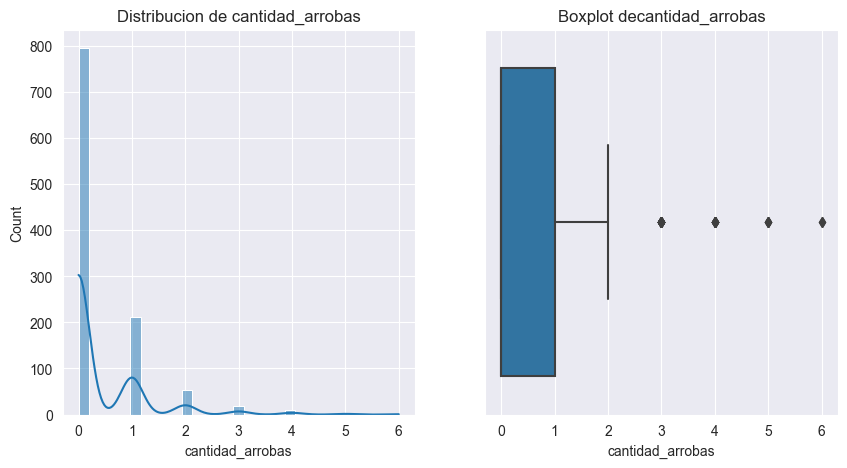

In [9]:
variable = 'cantidad_arrobas'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

In [10]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

df['cantidad_arrobas']= minmaxscaler.fit_transform(df[['cantidad_arrobas']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,language_name,cantidad_arrobas,cantidad_hashtag,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Senator,English,0.000000,1,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Representative,English,0.000000,0,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Representative,English,0.000000,2,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Representative,English,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Representative,English,0.166667,1,...,0,0,0,0,0,0,0,0,0,0


## Cantidad hashtag

<AxesSubplot: title={'center': 'Boxplot decantidad_hashtag'}, xlabel='cantidad_hashtag'>

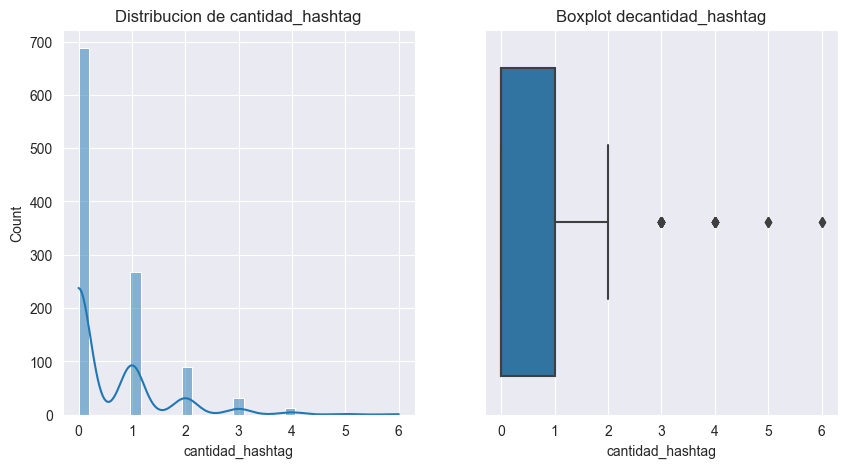

In [11]:
variable = 'cantidad_hashtag'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

In [12]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

df['cantidad_hashtag']= minmaxscaler.fit_transform(df[['cantidad_hashtag']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,language_name,cantidad_arrobas,cantidad_hashtag,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Senator,English,0.000000,0.166667,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Representative,English,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Representative,English,0.000000,0.333333,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Representative,English,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Representative,English,0.166667,0.166667,...,0,0,0,0,0,0,0,0,0,0


## Variables de: 0 y 1 :"tiene ..."

Estas no hace falta que se escalen.

# Encoding de vairbales categroicas

In [13]:
categoricas = df.select_dtypes(exclude=['float', 'integer']).columns
categoricas

Index(['audience', 'bias', 'message', 'source', 'cargo', 'language_name'], dtype='object')

In [14]:
print(f"Los valores unicos de audience son {df.audience.unique()}")
print(f"Los valores unicos de bias son {df.bias.unique()}")
print(f"Los valores unicos de source son {df.source.unique()}")
print(f"Los valores unicos de cargo son {df.cargo.unique()}")
print(f"Los valores unicos de language son {df.language_name.unique()}")

Los valores unicos de audience son ['national' 'constituency']
Los valores unicos de bias son ['partisan' 'neutral']
Los valores unicos de source son ['twitter' 'facebook']
Los valores unicos de cargo son ['Senator' 'Representative']
Los valores unicos de language son ['English' 'Spanish , Castilian' 'Desconocido']


### Audience, bias, source, cargo

In [15]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['audience'] = binary_encoder.fit_transform(df[['audience']])
df['bias'] = binary_encoder.fit_transform(df[['bias']])
df['source'] = binary_encoder.fit_transform(df[['source']])
df['cargo'] = binary_encoder.fit_transform(df[['cargo']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,language_name,cantidad_arrobas,cantidad_hashtag,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,1.0,1.0,attack,1.0,-0.602273,1.0,English,0.000000,0.166667,...,0,1,0,0,0,0,0,0,0,0
1,766192486,1.0,0.0,support,1.0,-0.022727,0.0,English,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
2,766192493,1.0,1.0,support,1.0,0.011364,0.0,English,0.000000,0.333333,...,0,0,0,0,0,1,0,0,0,1
3,766192495,1.0,1.0,attack,1.0,-0.318182,0.0,English,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,766192501,1.0,0.0,support,1.0,-0.113636,0.0,English,0.166667,0.166667,...,0,0,0,0,0,0,0,0,0,0


### Language_name

In [16]:
from sklearn.preprocessing import OneHotEncoder

language_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder

language_ohe.fit(df[['language_name']]) # Fit one hot encoder

language_ohe.categories_

[array(['Desconocido', 'English', 'Spanish , Castilian'], dtype=object)]

In [17]:
from sklearn.preprocessing import OneHotEncoder

language_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder

df['Desconocido'],df['English'],df['Spanish , Castilian']  = language_ohe.fit_transform(df[['language_name']]).T

df.drop(columns=['language_name'], inplace = True)

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,cantidad_arrobas,cantidad_hashtag,tiene_obama,...,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton,Desconocido,English,"Spanish , Castilian"
0,766192485,1.0,1.0,attack,1.0,-0.602273,1.0,0.000000,0.166667,1,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,766192486,1.0,0.0,support,1.0,-0.022727,0.0,0.000000,0.000000,0,...,1,1,0,0,0,0,0,0.0,1.0,0.0
2,766192493,1.0,1.0,support,1.0,0.011364,0.0,0.000000,0.333333,0,...,0,0,1,0,0,0,1,0.0,1.0,0.0
3,766192495,1.0,1.0,attack,1.0,-0.318182,0.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,766192501,1.0,0.0,support,1.0,-0.113636,0.0,0.166667,0.166667,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


# Encoding de la variable target: _message_

In [18]:
print(f"Los valores unicos de audience son {df.message.unique()}")

Los valores unicos de audience son ['attack' 'support']


In [19]:
from sklearn.preprocessing import LabelEncoder

df['message'] = LabelEncoder().fit_transform(df['message'])
df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,cantidad_arrobas,cantidad_hashtag,tiene_obama,...,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton,Desconocido,English,"Spanish , Castilian"
0,766192485,1.0,1.0,0,1.0,-0.602273,1.0,0.000000,0.166667,1,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,766192486,1.0,0.0,1,1.0,-0.022727,0.0,0.000000,0.000000,0,...,1,1,0,0,0,0,0,0.0,1.0,0.0
2,766192493,1.0,1.0,1,1.0,0.011364,0.0,0.000000,0.333333,0,...,0,0,1,0,0,0,1,0.0,1.0,0.0
3,766192495,1.0,1.0,0,1.0,-0.318182,0.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,766192501,1.0,0.0,1,1.0,-0.113636,0.0,0.166667,0.166667,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


# Arbol de decisión

In [43]:
from sklearn.model_selection import train_test_split

In [68]:
X =df.drop(columns=['message', 'unit_id'])
y = df['message']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.30)

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtree = DecisionTreeClassifier()
dtree= dtree.fit(X_train,y_train)
dtree

DecisionTreeClassifier()

In [72]:
y_pred = dtree.predict(X_test)

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8323170731707317


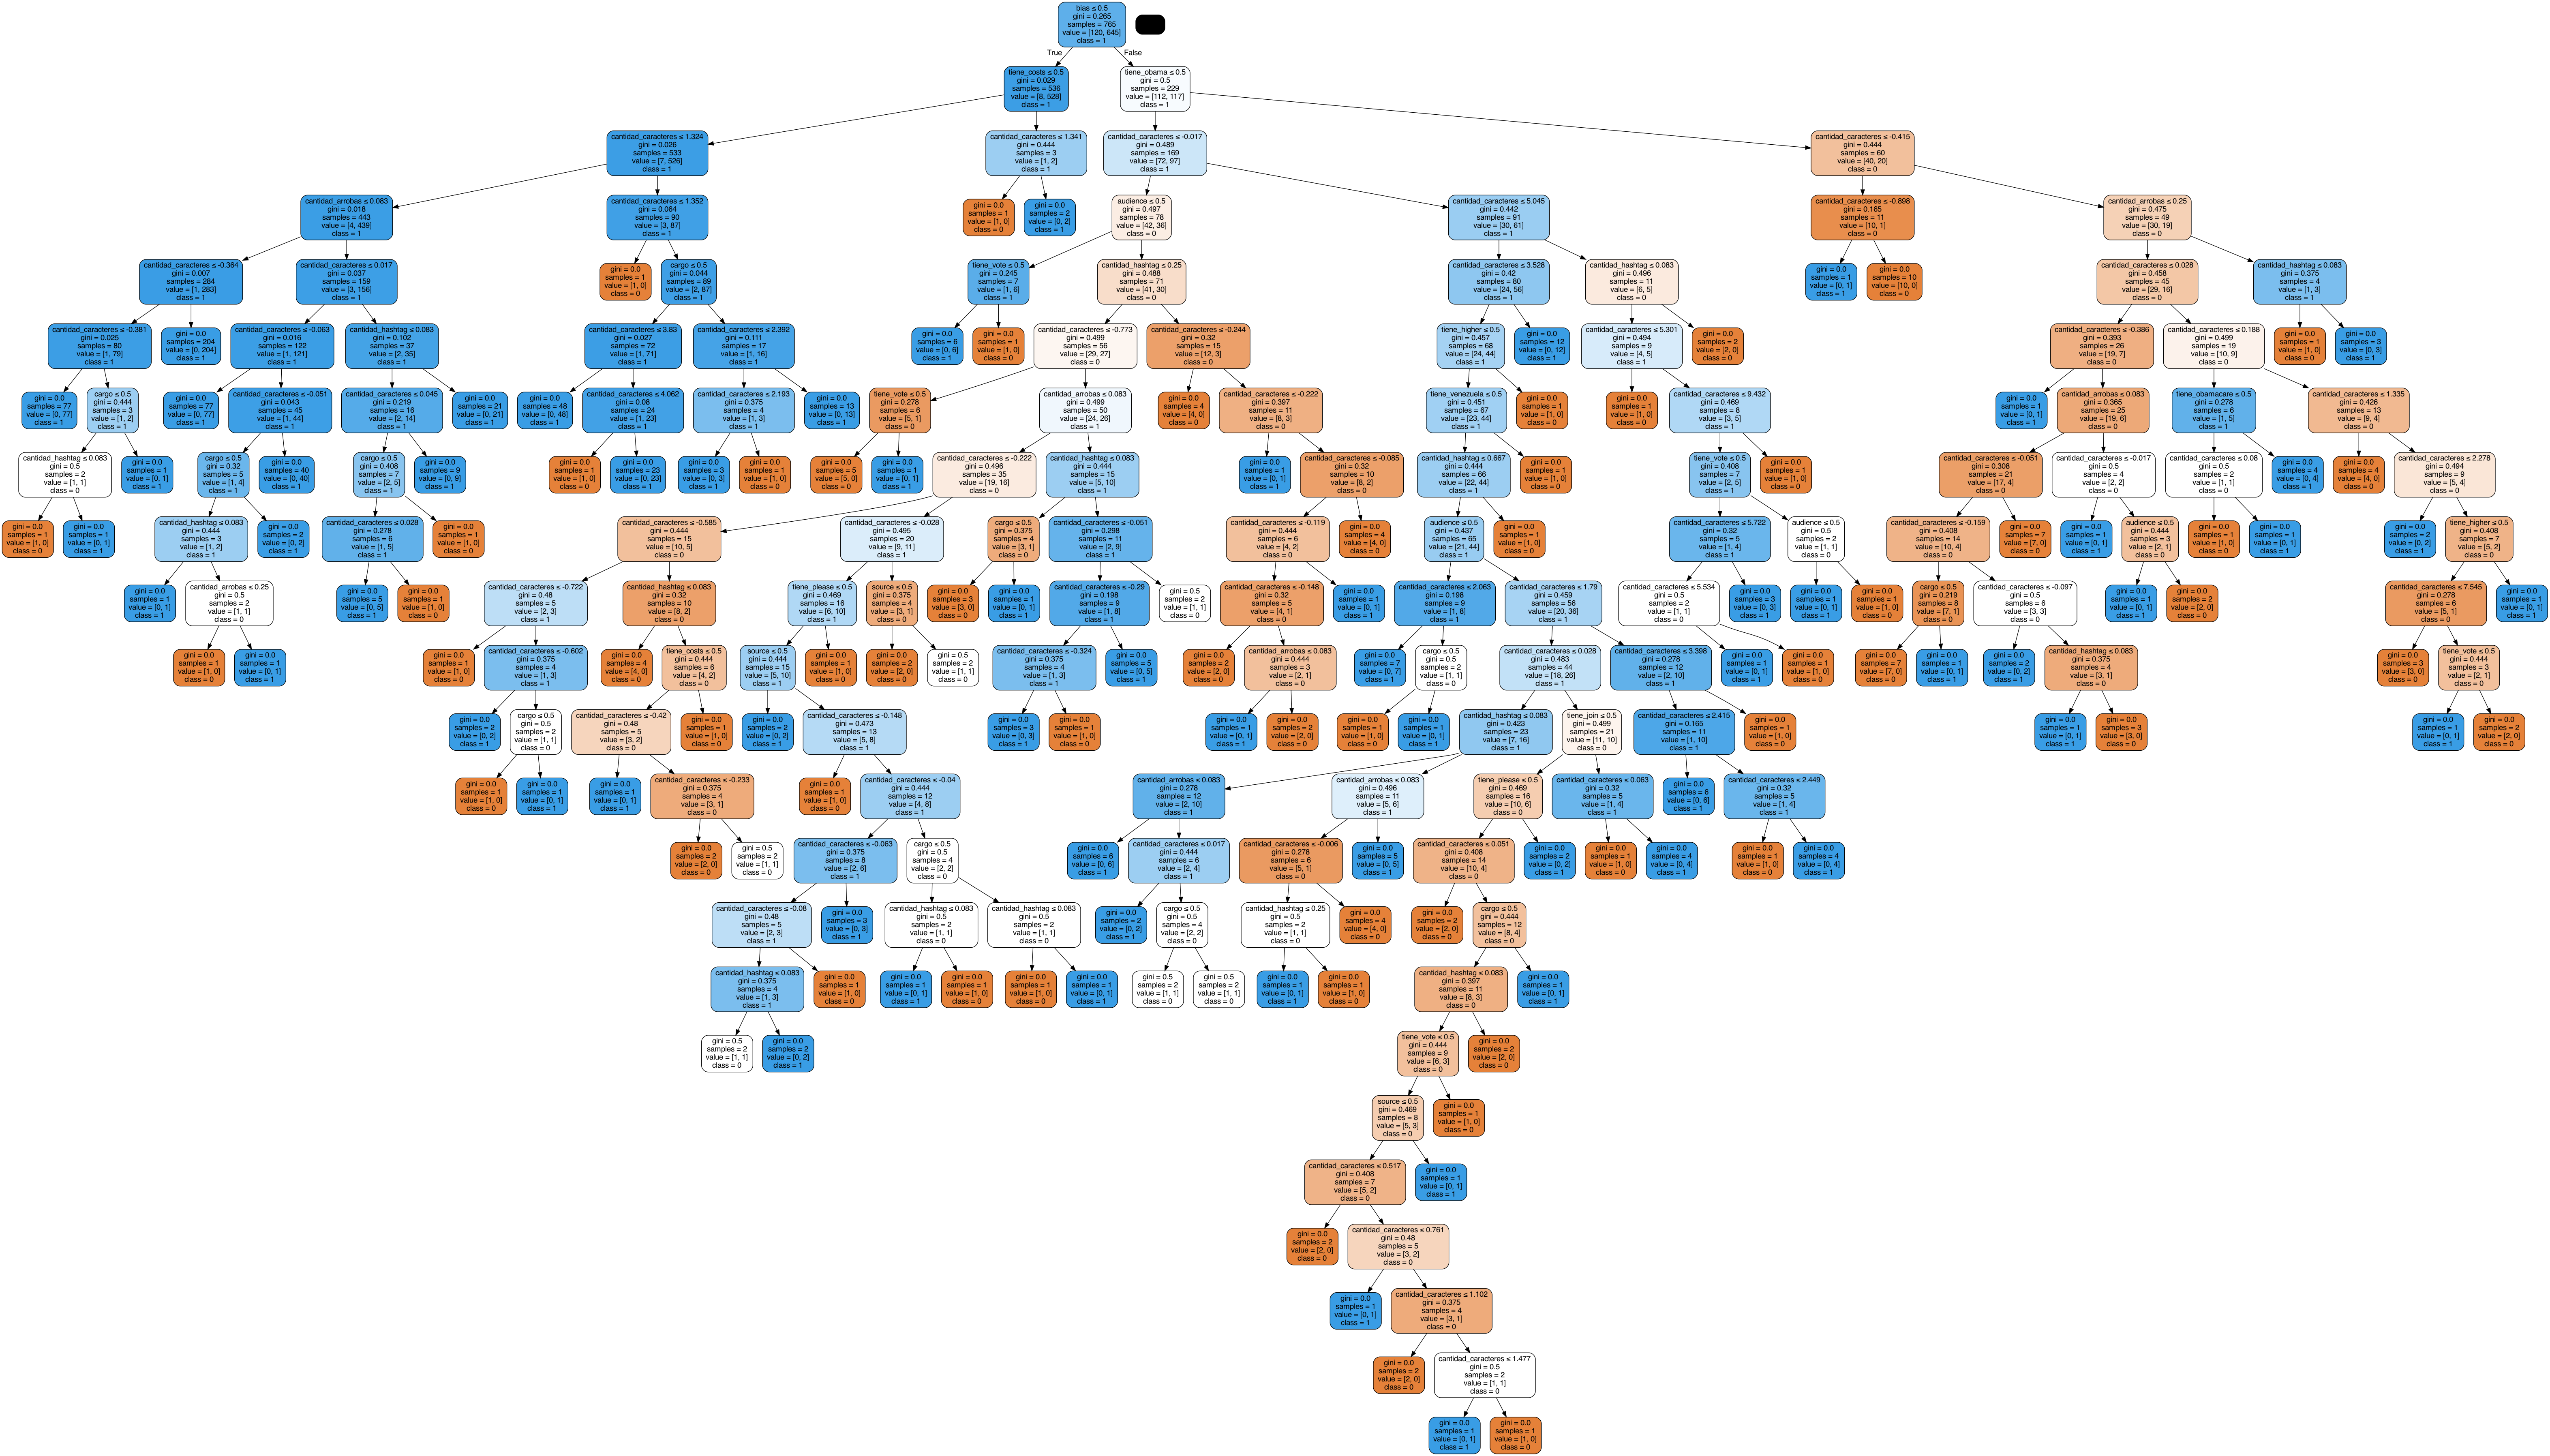

In [41]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../data/dtree_posts_1.png')
Image(graph.create_png())

0.8109

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.48      0.48        52
           1       0.90      0.90      0.90       276

    accuracy                           0.83       328
   macro avg       0.69      0.69      0.69       328
weighted avg       0.83      0.83      0.83       328



In [74]:
y_test.value_counts()

1    276
0     52
Name: message, dtype: int64

In [51]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 25  27]
 [ 23 253]]


# Mejorando el arbol de decision

In [75]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8475609756097561


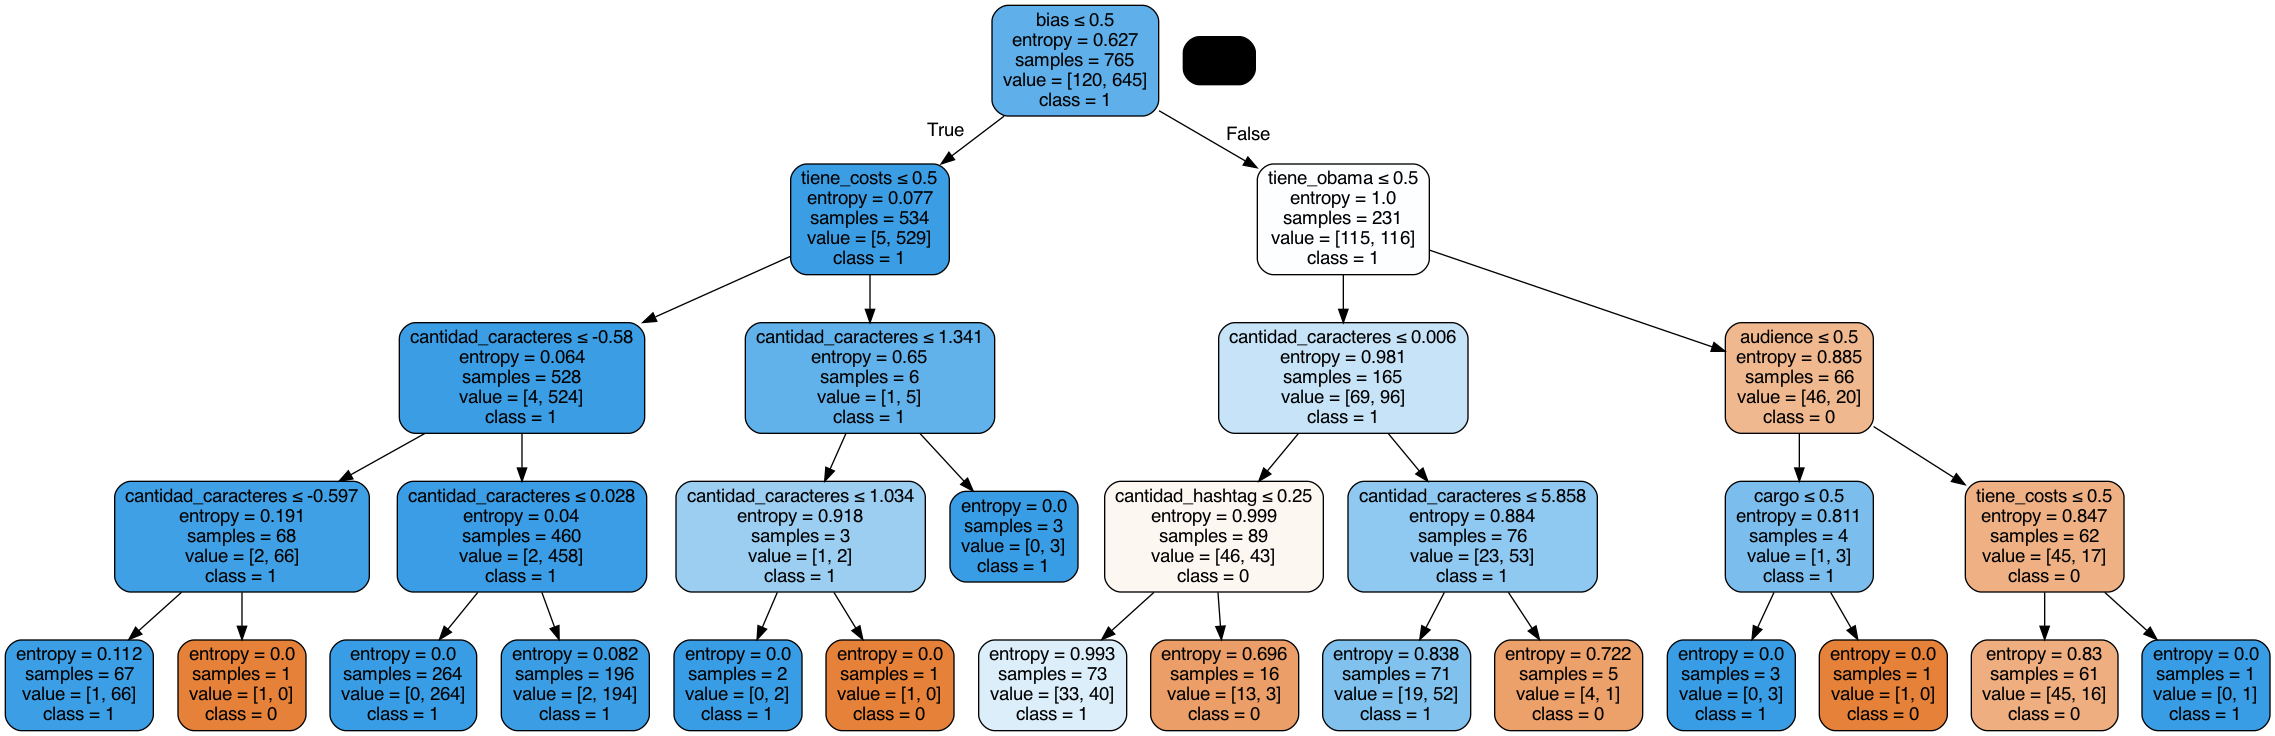

In [47]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../data/dtree_posts_2.png')
Image(graph.create_png())

Probe con otros max_depth y el mivel de accuracy no mejoro, por lo tanto esto es lo mejor

In [77]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8536585365853658


In [34]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../data/dtree_posts_3.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [55]:
from sklearn.tree import export_text

tree_rules = export_text(dtree,

                        feature_names = list(X.columns))

print(tree_rules)

|--- bias <= 0.50
|   |--- tiene_costs <= 0.50
|   |   |--- cantidad_caracteres <= -0.58
|   |   |   |--- cantidad_caracteres <= -0.60
|   |   |   |   |--- class: 1
|   |   |   |--- cantidad_caracteres >  -0.60
|   |   |   |   |--- class: 0
|   |   |--- cantidad_caracteres >  -0.58
|   |   |   |--- cantidad_caracteres <= 0.03
|   |   |   |   |--- class: 1
|   |   |   |--- cantidad_caracteres >  0.03
|   |   |   |   |--- class: 1
|   |--- tiene_costs >  0.50
|   |   |--- cantidad_caracteres <= 1.34
|   |   |   |--- cantidad_caracteres <= 1.03
|   |   |   |   |--- class: 1
|   |   |   |--- cantidad_caracteres >  1.03
|   |   |   |   |--- class: 0
|   |   |--- cantidad_caracteres >  1.34
|   |   |   |--- class: 1
|--- bias >  0.50
|   |--- tiene_obama <= 0.50
|   |   |--- cantidad_caracteres <= 0.01
|   |   |   |--- cantidad_hashtag <= 0.25
|   |   |   |   |--- class: 1
|   |   |   |--- cantidad_hashtag >  0.25
|   |   |   |   |--- class: 0
|   |   |--- cantidad_caracteres >  0.01
|   |  

In [60]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 26  26]
 [ 22 254]]


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52        52
           1       0.91      0.92      0.91       276

    accuracy                           0.85       328
   macro avg       0.72      0.71      0.72       328
weighted avg       0.85      0.85      0.85       328



1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

In [62]:
y_test.value_counts()

1    276
0     52
Name: message, dtype: int64

Explicar variable smas importantes.
Evaluacion: amtriz de ocnfusion, metricas de precicion, recall y accuracy. ¿Es bueno el modelo? Que significa el error que tiene

Predecir una insatncia que no exista
Explcia es ainstabcia con palabras
Explciar resultaod ¿tiene sentido la hipotesis?

Conclusion final ¿se cumple hipotesis?

In [63]:
X.head()

,audience,bias,source,cantidad_caracteres,cargo,cantidad_arrobas,cantidad_hashtag,tiene_obama,tiene_obamacare,tiene_costs,...,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton,Desconocido,English,"Spanish , Castilian"
0,1.0,1.0,1.0,-0.602273,1.0,0.000000,0.166667,1,1,1,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,1.0,0.0,1.0,-0.022727,0.0,0.000000,0.000000,0,0,0,...,1,1,0,0,0,0,0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.011364,0.0,0.000000,0.333333,0,0,0,...,0,0,1,0,0,0,1,0.0,1.0,0.0
3,1.0,1.0,1.0,-0.318182,0.0,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,1.0,0.0,1.0,-0.113636,0.0,0.166667,0.166667,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


In [83]:
prediction = dtree.predict([[0.0,1.0,0.0,-0.34,0.0,0.0,0.2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0]])[0]

prediction

/Users/Melimarkstein/.conda/envs/TP_final/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [81]:
probability = dtree.predict_proba([[0.0,1.0,0.0,-0.34,0.0,0.0,0.2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0]])[0][1]

probability

/Users/Melimarkstein/.conda/envs/TP_final/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.25

esto es attack